In [ ]:
# source for tutorial: https://www.tensorflow.org/quantum/tutorials/mnist

In [121]:
import importlib, pkg_resources
importlib.reload(pkg_resources)

<module 'pkg_resources' from 'C:\\Users\\Emily\\anaconda3\\lib\\site-packages\\pkg_resources\\__init__.py'>

In [122]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import collections

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt

In [129]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))


Number of original training examples: 60000
Number of original test examples: 10000


5


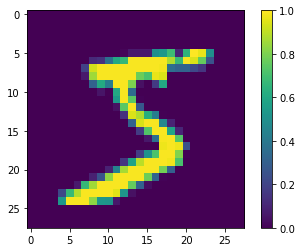

In [130]:
print(y_train[0])

plt.imshow(x_train[0, :, :, 0])
plt.colorbar()


In [125]:
def filter_36(x, y):
    keep = (y == 1) | (y == 2) |(y == 3) | (y == 4) | (y == 5) | (y == 6) | (y == 7) | (y == 8) | (y == 9)
    x, y = x[keep], y[keep]
    y = y == 3
    return x,y

In [126]:
x_train, y_train = filter_36(x_train, y_train)
x_test, y_test = filter_36(x_test, y_test)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))


Number of filtered training examples: 54077
Number of filtered test examples: 9020


In [131]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(28,28,1)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1))
    return model


model = create_classical_model()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()



Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_21 (Flatten)        (None, 9216)              0         
                                                                 
 dense_42 (Dense)            (None, 128)               1179776   
                                                     

In [132]:
model.fit(x_train,
          y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))

cnn_results = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: -1873524480.0000 - accuracy: 0.1135
